In [1]:
#librerías
import elasticsearch
from datetime import datetime
import pandas as pd

### PARTE 1: Extraer noticias

In [2]:
#parámetros de búsqueda
country="chile"
from_="2021-01-01"
to_="2021-01-07"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

keyword=""
simple_keyword=False

In [3]:
# parámetros de conexión al motor de búsqueda de Sophia

IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"


#NO MODIFICAR
es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)


# búsqueda de noticias de prensa
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 
      #"must": [
      #  {match: { "text":keyword}}

      #],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

In [4]:
res = es.search(index="news", query=query, size=10000)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 1009 noticias encontradas...


In [5]:
data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[],'search':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    search = keyword
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date, 'search':search}
    
    df = df.append(new_row, ignore_index=True);

#df

/tmp/ipykernel_3068/1497870751.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_3068/1497870751.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_3068/1497870751.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_3068/1497870751.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_3068/1497870751.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

In [6]:
df['url'].duplicated().any()
df = df.drop_duplicates(subset='url', keep='first')
#df

In [7]:
nombre_archivo=keyword.replace(' ', '')+"_"+country+"_"+from_+"_"+to_+".csv"
print("El archivo se llama:")
print(nombre_archivo)
df.to_csv("./"+nombre_archivo)

El archivo se llama:
_chile_2021-01-01_2021-01-07.csv


### PARTE 2: Extraer tópicos

In [8]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/home/myst/miniconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [9]:
import spacy
from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher

nlp = spacy.load("es_core_news_md")

In [10]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco de Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los Muermos","Maullín","Puerto Montt",
          "Puerto Varas","Osorno","Puerto Octay",
          "Purranque","Puyehue","Río Negro",
           "San Juan de la Costa","San Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]


matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

In [11]:
# leer el archivo CSV
archivo = "_chile_2021-01-01_2021-01-07.csv"
corpus = pd.read_csv(archivo)

In [12]:
corpus.drop('Unnamed: 0', axis=1, inplace=True)  

In [13]:
for index,row in corpus.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span

            print(span.text)
    
    except:
        pass

0
1
Puyehue
Puyehue
Puyehue
2
3
4
5
6
Cochamó
Hualaihué
Chaitén
Palena
7
Llanquihue
Llanquihue
8
Osorno
Osorno
Osorno
9
Osorno
Osorno
10
Osorno
Osorno
Osorno
Osorno
11
Osorno
Osorno
12
Osorno
Osorno
San Pablo
Osorno
13
Osorno
Osorno
Osorno
14
Osorno
Osorno
Osorno
Osorno
Osorno
Puerto Montt
15
Llanquihue
Llanquihue
16
Puerto Montt
Puerto Montt
Puerto Montt
Puerto Varas
17
Puerto Varas
Puerto Varas
Puerto Varas
Puerto Varas
18
19
Puerto Montt
Osorno
Quellón
Castro
20
Puerto Varas
Maullín
21
Puerto Montt
Puerto Montt
Puerto Montt
22
Puerto Varas
Maullín
Puerto Varas
Maullín
Puerto Varas
Maullín
Puerto Varas
Llanquihue
23
Puerto Octay
24
25
Puerto Varas
Puerto Varas
Puerto Varas
26
Ancud
Ancud
27
Puerto Montt
Puerto Montt
28
29
30
31
32
33
34
35
36
37
38
Puerto Montt
39
40
Osorno
41
42
43
44
45
Palena
Palena
Puerto Montt
Futaleufú
Palena
Palena
Puerto Montt
Palena
46
Puerto Montt
Puerto Montt
Puerto Montt
47
48
Osorno
Puerto Montt
49
Puerto Montt
50
Puerto Montt
Puerto Montt
Ancud
Puerto M

In [14]:
dataset_cities = corpus

for city in cities:
    dataset_cities.insert(7,city.replace(" ","_"),0)

In [15]:
dataset_cities.columns.values

array(['id_news', 'country', 'media_outlet', 'url', 'title', 'text',
       'date', 'Palena', 'Hualaihué', 'Futaleufú', 'Chaitén', 'San_Pablo',
       'San_Juan_de_la_Costa', 'Río_Negro', 'Puyehue', 'Purranque',
       'Puerto_Octay', 'Osorno', 'Puerto_Varas', 'Puerto_Montt',
       'Maullín', 'Los_Muermos', 'Llanquihue', 'Frutillar', 'Fresia',
       'Cochamó', 'Calbuco', 'Quinchao', 'Quellón', 'Quemchi', 'Queilén',
       'Puqueldón', 'Dalcahue', 'Curaco_de_Vélez', 'Chonchi', 'Castro',
       'Ancud', 'search'], dtype=object)

In [17]:
for index,row in dataset_cities.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index,span.text.replace(" ","_")]=1
    except Exception as e:
        print(e)
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [47]:
#dataset_cities

--- 
### Creamos una lista de noticias a partir de dataset_cities 

In [18]:
#noticias = corpus.text.values.tolist()
noticias = dataset_cities.text.values.tolist()

In [19]:
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

In [20]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [21]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [22]:
text_to_list(noticias[0])

['homicidio',
 '2021',
 'martes',
 'sábado',
 'ocasiones',
 'reos',
 'interior',
 'homicidio',
 'tan',
 'solo',
 'días',
 'cuarto',
 'diciembre',
 '–',
 'horas',
 'tarde',
 'martes',
 'área',
 'comedores',
 'módulo',
 'cárcel',
 'joven',
 'años',
 'edad',
 'información',
 'momento',
 'circunstancias',
 'crimen',
 'diligencias',
 'investigación',
 'sitio',
 'suceso',
 'autopsia',
 'tanto',
 'víctima',
 'herida',
 'hechos',
 'autor',
 'medidas',
 'aislamiento',
 'pese',
 'esfuerzos',
 'interno',
 'institución',
 'investigación',
 'sumario',
 'Fuente',
 'ocasiones distintas',
 'área de comedores',
 'años de edad',
 'información preliminar',
 'diligencias de investigación',
 'autopsia correspondiente',
 'herida cortopunzante',
 'autor está',
 'medidas de aislamiento',
 'esfuerzos clínicos',
 'institución penitenciaria',
 'investigación interna',
 'sumario administrativo']

In [23]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [24]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
#id2word

In [25]:
texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]
#dataset

---
### Buscamos el número óptimo de tópicos

In [33]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [34]:
start=2
limit=15
step=2

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


---
### Elegimos el mejor número de tópicos

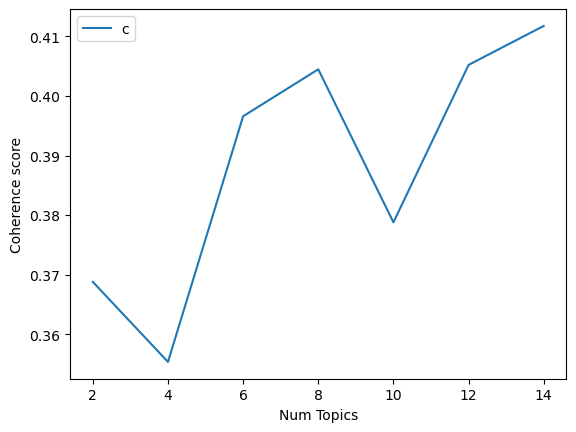

In [35]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [36]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3688
Num Topics = 4  has Coherence Value of 0.3554
Num Topics = 6  has Coherence Value of 0.3966
Num Topics = 8  has Coherence Value of 0.4045
Num Topics = 10  has Coherence Value of 0.3788
Num Topics = 12  has Coherence Value of 0.4052
Num Topics = 14  has Coherence Value of 0.4118


In [41]:
# Select the model and print the topics
optimal_model = model_list[3]

In [43]:
archivo='./output/optimal_model_chile_8'
optimal_model.save(archivo)

---
### Visualizamos el mejor modelo (con 8 tópicos)

In [46]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word);
vis

/home/myst/miniconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.275877  0.045588       1        1  47.599677
3      0.014562 -0.257358       2        1  12.608515
6     -0.030027 -0.031060       3        1   8.975100
1     -0.087160  0.077033       4        1   8.393649
5      0.032623  0.077856       5        1   7.596200
0     -0.027161  0.038262       6        1   7.004911
7     -0.080706  0.018554       7        1   4.666377
4     -0.098008  0.031125       8        1   3.155572, topic_info=              Term        Freq       Total Category  logprob  loglift
65             año  267.000000  267.000000  Default  30.0000  30.0000
759          casos  243.000000  243.000000  Default  29.0000  29.0000
595           fase   88.000000   88.000000  Default  28.0000  28.0000
87        personas  295.000000  295.000000  Default  27.0000  27.0000
1149       permiso   52.000000   52.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1025  conversación    4.177018   15.801505   Topic8  -5.7629   2.1255
166       respecto    5.104159   98.535161   Topic8  -5.5624   0.4956
2332        visión    3.765972   10.162470   Topic8  -5.8665   2.4633
248          forma    4.602243  109.910815   Topic8  -5.6659   0.2829
605      resultado    3.713502   16.195169   Topic8  -5.8805   1.9833

[481 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6796      3  0.842844         '
109       2  0.104964      2019
109       6  0.874700      2019
110       1  0.449130      2020
110       2  0.149710      2020
...     ...       ...       ...
5148      7  0.903918  votación
1503      8  0.936425     votos
303       1  0.399394     áreas
303       2  0.266263     áreas
303       7  0.310640     áreas

[762 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 7, 2, 6, 1, 8, 5])

Algunos keywords de los tópicos:
1. personas, caso, año, pandemia -> tiene que ver con COVID-19
2. año, recursos, proyecto, trabajo, comuna
3. años, etapa, reforma, municipios
4. enero, partido, candidatos, trabajo, etapa, país
5. permiso, fase, turismo, personas, delitos, vacaciones
6. 2019, consumo, trimestre, leche, pensiones, mujeres, empleo, niños
7. fuegos artificiales, protección, pirotecnia, humedales, vecinos
8. tiene que ver con política de USA


In [107]:
def format_topics_documents(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/tmp/ipykernel_3068/4135286971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/tmp/ipykernel_3068/4135286971.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2,0.9888,"personas, casos, año, pandemia, días, país, re...",El tercer homicidio en lo poco que va de este ...
1,1,3,0.8198,"año, años, recursos, proyecto, trabajo, parte,...","Dicho programa, financiado por el Gobierno Reg..."
2,2,0,0.8896,"año, 2019, consumo, trimestre, meses, país, re...",Un balance positivo de las principales activid...
3,3,5,0.7148,"permiso, fase, turismo, hechos, personas, deli...",Los hechos se produjeron ayer lunes 4 de enero...
4,4,3,0.9895,"año, años, recursos, proyecto, trabajo, parte,...",Tras diez años al mando de Cooprinsem y más de...
5,5,7,0.5664,"fuegos, protección, humedales, fuegos artifici...",El Tribunal de Garantía de Valdivia otorgó una...
6,6,5,0.6421,"permiso, fase, turismo, hechos, personas, deli...",Se trata de un instrumento de planificación pa...
7,7,2,0.9882,"personas, casos, año, pandemia, días, país, re...",Actualmente en la comuna de Llanquihue existe ...
8,8,4,0.6357,"presupuesto, playas, votos, elecciones, victor...","Si todo marcha de acuerdo a lo programado, lle..."
9,9,2,0.7229,"personas, casos, año, pandemia, días, país, re...",La comuna de Osorno este martes inoculó a cuat...


In [108]:
cities_fix = ["Ancud","Castro","Chonchi",
           "Curaco_de_Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los_Muermos","Maullín","Puerto_Montt",
          "Puerto_Varas","Osorno","Puerto_Octay",
          "Purranque","Puyehue","Río_Negro",
           "San_Juan_de_la_Costa","San_Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

cities_filter = corpus.filter(cities_fix, axis=1)
df_dominant_topic=df_dominant_topic.join(cities_filter)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Ancud,Castro,Chonchi,Curaco_de_Vélez,Dalcahue,...,Puerto_Octay,Purranque,Puyehue,Río_Negro,San_Juan_de_la_Costa,San_Pablo,Chaitén,Futaleufú,Hualaihué,Palena
0,0,2,0.9888,"personas, casos, año, pandemia, días, país, re...",El tercer homicidio en lo poco que va de este ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,0.8198,"año, años, recursos, proyecto, trabajo, parte,...","Dicho programa, financiado por el Gobierno Reg...",0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,0,0.8896,"año, 2019, consumo, trimestre, meses, país, re...",Un balance positivo de las principales activid...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5,0.7148,"permiso, fase, turismo, hechos, personas, deli...",Los hechos se produjeron ayer lunes 4 de enero...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,3,0.9895,"año, años, recursos, proyecto, trabajo, parte,...",Tras diez años al mando de Cooprinsem y más de...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,347,1,0.6079,"enero, partido, candidato, horas, etapa, candi...",Hasta el 11 de Enero hay plazo para patrocinar...,0,0,0,0,0,...,1,1,1,1,0,1,0,0,0,0
348,348,2,0.4986,"personas, casos, año, pandemia, días, país, re...","Desde el 4 de enero, en el sitio web de “Jóven...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,349,2,0.9907,"personas, casos, año, pandemia, días, país, re...",Ante relajación en las medidas de seguridad pa...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,350,6,0.5706,"años, etapa, día, año, reforma, municipios, pe...","El vicepresidente del Senado, Rabindranath Qui...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Realizamos un análisis por comunas
- Ancud
- Castro
- Chonchi
- Curaco de Vélez
- Dalcahue 
- Puqueldón
- Queilén
- Quemchi
- Quellón
- Quinchao
- Calbuco
- Cochamó
- Fresia
- Frutillar
- Llanquihue
- Los Muermos
- Maullín
- Puerto Montt
- Puerto Varas
- Osorno
- Puerto Octay
- Purranque
- Puyehue
- Río Negro
- San Juan de la Costa
- San Pablo
- Chaitén
- Futaleufú
- Hualaihué
- Palena"

In [168]:
data_comunas = {'Comunas':[],'Cantidad de noticias':[],'Tópicos más relevantes':[]}
df_comunas = pd.DataFrame(data_comunas)

df_comunas["Comunas"] = cities_fix
df_comunas["Tópicos más relevantes"] = df_comunas["Tópicos más relevantes"].astype(object)

In [169]:
num_noticias = []
n_topicos = 3

for i in range(len(cities_fix)):
    temp = df_dominant_topic[df_dominant_topic[cities_fix[i]] > 0]
    num_noticias.append(len(temp))

    temp2 = temp["Dominant_Topic"].value_counts()[:n_topicos].index.tolist()
    df_comunas["Tópicos más relevantes"].loc[i] = temp2


df_comunas["Cantidad de noticias"] = num_noticias

/tmp/ipykernel_3068/1360206323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comunas["Tópicos más relevantes"].loc[i] = temp2
/tmp/ipykernel_3068/1360206323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comunas["Tópicos más relevantes"].loc[i] = temp2
/tmp/ipykernel_3068/1360206323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comunas["Tópicos más relevantes"].loc[i] = temp2
/tmp/ipykernel_3068/1360206323.py:

In [170]:
df_comunas

,Comunas,Cantidad de noticias,Tópicos más relevantes
0,Ancud,25,"[2, 3, 7]"
1,Castro,40,"[2, 6, 5]"
2,Chonchi,14,"[2, 7, 1]"
3,Curaco_de_Vélez,9,"[2, 3]"
4,Dalcahue,11,"[2, 1, 3]"
5,Puqueldón,9,"[2, 5]"
6,Queilén,0,[]
7,Quemchi,8,"[2, 3]"
8,Quellón,24,"[2, 7, 6]"
9,Quinchao,12,"[2, 7, 3]"


In [171]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.275877  0.045588       1        1  47.599677
3      0.014562 -0.257358       2        1  12.608515
6     -0.030027 -0.031060       3        1   8.975100
1     -0.087160  0.077033       4        1   8.393649
5      0.032623  0.077856       5        1   7.596200
0     -0.027161  0.038262       6        1   7.004911
7     -0.080706  0.018554       7        1   4.666377
4     -0.098008  0.031125       8        1   3.155572, topic_info=              Term        Freq       Total Category  logprob  loglift
65             año  267.000000  267.000000  Default  30.0000  30.0000
759          casos  243.000000  243.000000  Default  29.0000  29.0000
595           fase   88.000000   88.000000  Default  28.0000  28.0000
87        personas  295.000000  295.000000  Default  27.0000  27.0000
1149       permiso   52.000000   52.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1025  conversación    4.177018   15.801505   Topic8  -5.7629   2.1255
166       respecto    5.104159   98.535161   Topic8  -5.5624   0.4956
2332        visión    3.765972   10.162470   Topic8  -5.8665   2.4633
248          forma    4.602243  109.910815   Topic8  -5.6659   0.2829
605      resultado    3.713502   16.195169   Topic8  -5.8805   1.9833

[481 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6796      3  0.842844         '
109       2  0.104964      2019
109       6  0.874700      2019
110       1  0.449130      2020
110       2  0.149710      2020
...     ...       ...       ...
5148      7  0.903918  votación
1503      8  0.936425     votos
303       1  0.399394     áreas
303       2  0.266263     áreas
303       7  0.310640     áreas

[762 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 7, 2, 6, 1, 8, 5])